<a href="https://colab.research.google.com/github/YenLinWu/Model_Drift/blob/dev/KS_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align='center' ><font size='70'>KS 檢定</font></div>

<center>      
About Author      
  
[![Linkedin](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/yenlinwu/)    [![GitHub](https://img.shields.io/badge/github-%23121011.svg?style=for-the-badge&logo=github&logoColor=white)](https://github.com/YenLinWu)
</center>

# KS 檢定 - 介紹

<font color="#dddd00">KS 檢定</font>(<font color="#dddd00">K</font>olmogorov-<font color="#dddd00">S</font>mirnov Test, <font color="#dddd00">KS Test</font>)係一種[無母數統計檢定(Nonparametric Statistics)](https://en.wikipedia.org/wiki/Nonparametric_statistics)，主要係藉由比較兩樣本的[累積分佈函數(Cumulative Distribution Function, CDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function)，透過計算兩 CDF 之間的最大差距，來檢測這兩樣本是否源自於同一個母體分佈。  
  
KS 檢定統計量定義如下:  

$$D_{n,\ m} = \sup_{x} \lvert F_{P,\ n}(x)- F_{Q,\ m}(x) \rvert , $$  

其中， $n$、$m$ 分別為兩樣本 $P$ 與 $Q$ 的樣本數量，$F_{P,\ n}$、$F_{Q,\ m}$ 分別為兩樣本 $P$ 與 $Q$ 的累積分佈函數。KS 檢定統計量 $D_{n,\ m}$ 介於 $[0, 1]$ 區間之中，其所表示的差距，如下圖所示:  

<p align="center">
<img width="350" src="https://upload.wikimedia.org/wikipedia/commons/3/3f/KS2_Example.png">
</p>

當我們檢測兩樣本是否源自於同一個母體分佈時，此時的虛無假設 $H_0$ 為兩樣本 $P$ 與 $Q$ 源自於同一個母體分佈，拒絕虛無假設 $H_0$ 的條件如下:  

$$D_{n,\ m} > c(\alpha)\cdot\sqrt{\frac{n+m}{n\cdot m}}, \tag{1.1} $$  

其中，$\alpha$ 為顯著水準(Significant Level)且 

$$\displaystyle c(\alpha) = \sqrt{ -\ln(\frac{\alpha}{2})\cdot \frac{1}{2} }。$$  

當上述條件不等式 $(1.1)$ 成立時，則拒絕虛無假設 $H_0$，表示有顯著的證據表明兩樣本不來自同一個母體分佈，這意味著兩樣本之間存在顯著的差異，可用來區分它們。相反地，若我們接受虛無假設 $H_0$ ，則表示兩樣本之間無顯著的差異，也就是說，它們來自同一個母體分佈，但是，這並不能表示兩樣本之間具有[相關性(Correlation)](https://en.wikipedia.org/wiki/Correlation)。



# KS 檢定 - 應用

在機器學習的領域中，KS 檢定除可用於檢測數據飄移(Data Drift)之外，它還有下列的應用:  

1. **特徵選擇(Feature Selection)**  
在語音辨識的應用中，過去曾有研究人員藉由兩樣本的 KS 檢定，提取出具有統計意義的特徵。  

2. **評估分類模型的表現**   
藉由將模型的預測值與實際值進行 KS 檢定，可用以評估模型的擬合能力與準確度。

3. **偵測異常值**   
在建迴歸預測模型時，有一強烈的統計假設: 殘差須符合標準常態分佈，若標準化殘差經由 KS 檢定後，為拒絕虛無假設 $H_0$，則表示訓練集中疑似存在異常值。  



# Python 程式碼

下列我們將藉由鎳現金結算(Nickel Cash Settlement)的市場資料，示範如何運用 KS 檢定來衡量資料偏移。  

在俄烏戰爭爆發( 2022年 2月 24日 )的幾個交易天後，鎳現金結算發生了前所未見的暴漲，市場將此事件稱為「妖鎳事件」，相關報導請參閱 [一天暴漲超過100%！妖「鎳」衝破10萬美元，空頭大戶慘遭軋爆，交易所暫停交易](https://www.storm.mg/lifestyle/4229380)。因此，我們將使用 2021 年起每個交易日的鎳現金結算，透過兩種不同的偵測方式，觀察市場在「妖鎳事件」發生的前後，資料是否產生明顯的偏移現象?

<p align="left">
<img width="550" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/KS_Test/Imgs/Nickel_Price_Trend.png">
</p>

* 資料來源: [Westmetall - Market data](https://www.westmetall.com/en/markdaten.php?action=table&field=LME_Ni_cash)
  
</br>  

我們將使用滑動視窗來偵測資料是否偏移，滑動視窗的偵測方式分為兩種，如下說明:    

* 方法一  
固定滑動視窗 P、移動滑動視窗 Q，如下圖所示:
<p align="left">
<img width="450" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/KS_Test/Imgs/Illustration_of_1_Fixed_Sliding_Window.png">
</p>
【偵測結果】</br> 以 2022 年 1月的鎳現金結算為基礎，藉由方法一的偵測方式，我們可清楚發現，在妖鎳事件的附近一段時間，KS 檢定的推論皆為拒絕虛無假設 $H_0$ ，表示那段時間與年初 1月的資料有所差異，另外，隨著時間的推移，從年底 11月起，與年初 1月的資料也有明顯差異。
<p align="left">
<img width="450" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/KS_Test/Imgs/Data_Drift_Detection_in_KS_Test_with_fixed_1_sliding_window.gif">
</p>
</br>

* 方法二  
滑動視窗 P 與 Q 皆會移動，而，滑動視窗 P 的移動，係依據前幾次 KS 檢定的推論決定，如下圖所示:   
<p align="left">
<img width="450" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/KS_Test/Imgs/Illustration_of_2_Unfixed_Sliding_Windows.png">
</p>
【偵測結果】</br>下圖的偵測結果，滑動視窗 P 的移動，係當連續 5 次的 KS 檢定推論為拒絕虛無假設 $H_0$ 時，在進行下一次偵測時，將會以前一次滑動視窗 Q 的資料，作為這一次滑動視窗 P 的資料。</br>
從 2021 年 1月的鎳現金結算開始，藉由方法二的偵測方式，我們可清楚發現，在妖鎳事件的附近一段時間，除 KS 檢定的推論皆為拒絕虛無假設 $H_0$ 之外， KS 檢定統計量的走勢，變異大且頻率較 2021 年密集。   
<p align="left">
<img width="450" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/KS_Test/Imgs/Data_Drift_Detection_in_KS_Test_with_unfixed_2_sliding_windows.gif">
</p>


## Step 1: 匯入套件

In [1]:
import sys
import os
import math
import datetime

import numpy as np
import pandas as pd
import scipy
from scipy.stats import ks_2samp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('ggplot')
from PIL import Image

# 套件版本
print('Python Version:', sys.version[0:7]) 
print('Numpy Version:', np.__version__)
print('Pandas Version:', pd.__version__)
print('SciPy Version:', scipy.__version__)
print('Matplotlib Version:', matplotlib.__version__)

Python Version: 3.8.10 
Numpy Version: 1.22.4
Pandas Version: 1.3.5
SciPy Version: 1.10.1
Matplotlib Version: 3.5.3


## Step 2: 匯入資料  



In [2]:
# 資料讀取
file_name = r'Nickel_Market_Info.xlsx'
data_path = os.path.join(os.getcwd(), file_name)
data = pd.read_excel(data_path, sheet_name='LME_Market_Data')

# 字串型態的日期轉換成日期型態
data['date'] = pd.to_datetime(data['date'], format='%d. %B %Y')  

data

,date,LME Nickel Cash-Settlement,LME Nickel 3-month,LME Nickel stock
0,2023-02-28,24820,25100,44148
1,2023-02-27,24600,24900,44442
2,2023-02-24,24850,25200,44580
3,2023-02-23,25600,25850,44346
4,2023-02-22,26225,26500,44514
...,...,...,...,...
1552,2017-01-09,10245,10285,372012
1553,2017-01-06,10185,10240,370920
1554,2017-01-05,10230,10280,370920
1555,2017-01-04,9975,10025,371724


### Step 2-1: 視覺化

從 2017 年 1 月至 2023 年 2 月中旬的每個交易日，鎳現金結算的走勢圖:  

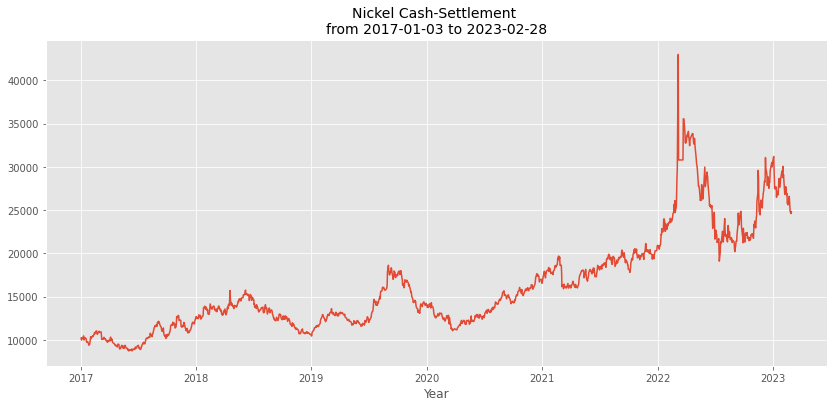

In [3]:
# 資料的起迄日
start_date = str(data['date'].iloc[-1].date()) 
end_date = str(data['date'].iloc[0].date()) 

# 趨勢圖
plt.figure(figsize=(14,6))
plt.plot(data['date'], data['LME Nickel Cash-Settlement'])
plt.title('Nickel Cash-Settlement \nfrom '+start_date+' to '+end_date, fontsize=14)
plt.xlabel('Year')
plt.savefig('Trend_of_Nickel_Cash_Settlement.png', bbox_inches='tight', format='png')
plt.show()

在上列趨勢圖中，加入國際重大事件的資訊:

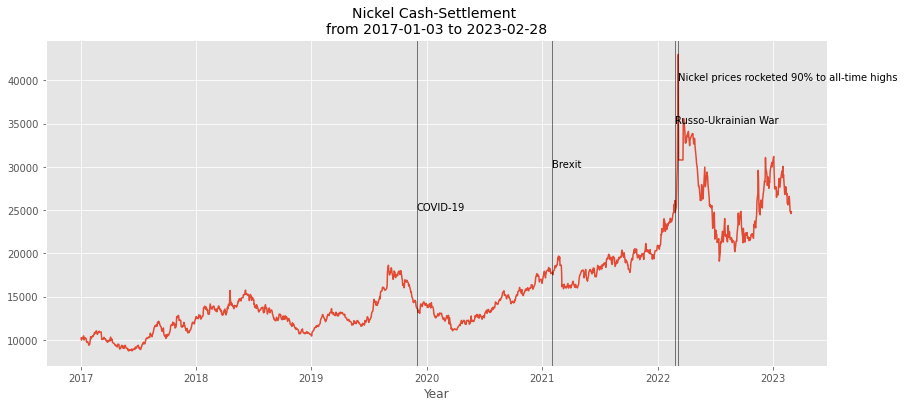

In [4]:
# 國際重大事件
events = pd.DataFrame({'date':[datetime.date(2019, 12, 1), datetime.date(2021, 1, 31), 
                               datetime.date(2022, 2, 24), datetime.date(2022, 3, 7)],
                       'event':['COVID-19', 'Brexit', 
                                'Russo-Ukrainian War', 'Nickel prices rocketed 90% to all-time highs']})

# 資料視覺化(包含國際重大事件)
plt.figure(figsize=(14,6))
plt.plot(data['date'], data['LME Nickel Cash-Settlement'])

for i in range(len(events)):
    plt.axvline(x=events['date'][i], lw=0.5, color='black', linestyle='-')
    plt.annotate(str(events['event'][i]),  xy=(events['date'][i], 25000+i*5000))

plt.title('Nickel Cash-Settlement \nfrom '+start_date+' to '+end_date, fontsize=14)
plt.xlabel('Year')
plt.show()

2021年起的每個交易日，鎳現金結算的走勢圖:

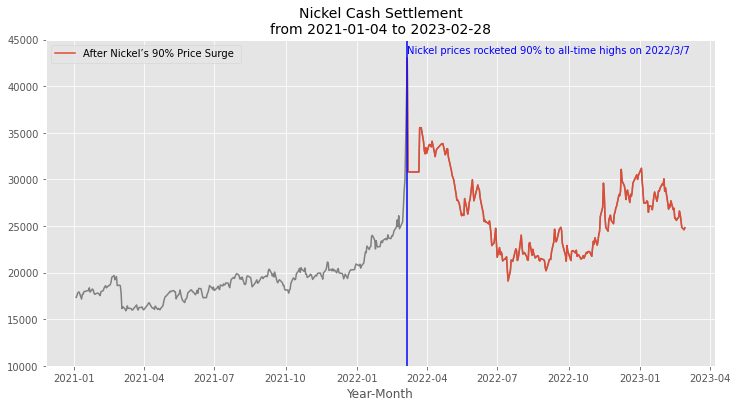

In [5]:
# 妖鎳事件(2022年 3月 7日)
event = pd.DataFrame({'date':[ datetime.date(2022, 3, 7)],
                      'event':['Nickel prices rocketed 90% to all-time highs']})
after_event = data['date'].dt.date>=datetime.date(2022, 3, 7)
data['after_event'] = after_event.values

# 2021 年起每個交易日的鎳現金結算
date_idx = data.index[data['date'].dt.year>=2021].sort_values(ascending=False)
dates = data.loc[date_idx, 'date']
cash_settlement = data.loc[date_idx, 'LME Nickel Cash-Settlement']

# 妖鎳事件發生後，每日交易日的鎳現金結算
after_event_date_idx = data.index[data['after_event']==True].sort_values(ascending=False)
after_event_dates = data.loc[after_event_date_idx, 'date']
after_event_cash_settlement = data.loc[after_event_date_idx, 'LME Nickel Cash-Settlement']
after_event_cash_settlement

# 資料起迄日期
start_date = str(dates[date_idx[0]].date())
end_date = str(dates[date_idx[-1]].date())

# 趨勢圖
plt.figure(figsize=(12,6))
plt.plot(dates, cash_settlement, color='gray')
plt.plot(after_event_dates, after_event_cash_settlement, label='After Nickel’s 90% Price Surge ')
plt.legend(loc=2)
plt.yticks(np.arange(10000, 50000, 5000))
plt.axvline(x=event['date'][0], lw=1.5, color='blue', linestyle='-')
plt.annotate('Nickel prices rocketed 90% to all-time highs on 2022/3/7', color='blue', xy=(event['date'][0], 43500))
plt.title('Nickel Cash Settlement\nfrom '+start_date+' to '+end_date, fontsize=14)
plt.xlabel('Year-Month')
plt.show()

## Step 3: 定義函數  
有關 KS 檢定偵測數據飄移， Python 程式碼執行的步驟如下:

*   **Step 1**:   
定義計算兩樣本的[累積分佈函數(Cumulative Distribution Function, CDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function) 的函數，且，此函數中藉由兩樣本的 CDF 來算得 KS 檢定統計量 $D_{n,\ m}$。    

*   **Step 2**:  
除上列 Step 1 的自定義函數外，我們也可利用 SciPy 套件中的 [`scipy.stats.ks_2samp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy-stats-ks-2samp) 函數，對兩樣本做雙尾的 KS 檢定，可得檢定統計量 $D_{n,\ m}$ 與 P Value 的資訊。

*   **Step 3**:  
定義在 KS 檢定中拒絕虛無假設 $H_0$ 的函數。當兩樣本的樣本數足夠大時，拒絕虛無假設 $H_0$ 的條件如下:    
$$D_{n,\ m} > c(\alpha)\cdot\sqrt{\frac{n+m}{n\cdot m}},$$  
其中， $n$ 與 $m$ 分別為兩樣本的樣本數量，$\alpha$ 為顯著水準，且 $\displaystyle c(\alpha) = \sqrt{ -\ln(\frac{\alpha}{2})\cdot \frac{1}{2} }$。  
  


💻 定義計算兩樣本累積分佈函數(CDF)的函數:

In [6]:
def cdf_two_samples(p_data, q_data):
    """
    兩樣本 P 與 Q 各別的累積分布函數(Cumulative Distribution Function)。 

    params:
        p_data (series): 樣本 P
        q_data (series): 樣本 Q

    returns:
        cdf (dataframe): 累積分布函數
        ks_statistic (flaot): KS 檢定統計量
    """    

    if not isinstance(p_data, pd.Series):
        raise TypeError('p_data 參數的資料型態須為 pd.Series。')

    if not isinstance(q_data, pd.Series):
        raise TypeError('q_data 參數的資料型態須為 pd.Series。')  
    
    observations = np.sort(p_data.append(q_data))
    sorted_p_data = np.sort(p_data)
    sorted_q_data = np.sort(q_data)
    
    cdf_of_p = []
    cdf_of_q = []
    for x in observations:
        cdf_of_p.append(sum(sorted_p_data<=x)/len(p_data))
        cdf_of_q.append(sum(sorted_q_data<=x)/len(q_data))

    cdf = pd.DataFrame({'x':observations, 'cdf_of_p':cdf_of_p, 'cdf_of_q':cdf_of_q})
    cdf['ks_statistic'] = abs(cdf['cdf_of_p']-cdf['cdf_of_q']) 
    cdf.drop_duplicates(keep='first', ignore_index=True, inplace=True)

    return cdf

如前述，在 KS 檢定中，拒絕虛無假設 $H_0$ 的判斷條件為
$$D_{n,\ m} > c(\alpha)\cdot\sqrt{\frac{n+m}{n\cdot m}},$$  
  
其中，$D_{n,\ m}$ 為檢定統計量， $n$ 與 $m$ 分別為兩樣本的樣本數量，$\alpha$ 為顯著水準，且 $c(\alpha)$ 的定義為:  
  
$$\displaystyle c(\alpha) = \sqrt{ -\ln(\frac{\alpha}{2})\cdot \frac{1}{2} }。$$
  

常見的顯著水準 $\alpha$ 與相對應的 $c(\alpha)$ 如下表:   
<div align="center">

|  |  |  | |
| --- | ---: |---:|---:|
|$\alpha$|0.01|0.05|0.1|
|$c(\alpha)$|1.627624|1.358102|1.223873|

</div>

  
💻 定義顯著水準轉換值 $c(\alpha)$ 的函數:  

In [7]:
def calculate_c_alpha(significance_level=0.05):
    """
    計算顯著水準(alpha)的轉換值(c_aplha)。 
    
    params:
        significance_level (float): 顯著水準，預設為 0.05

    returns:
        顯著水準的轉換值
    """

    return np.sqrt(-0.5*np.log(significance_level/2))

當判斷條件 $D_{n,\ m}>c(\alpha)\cdot\sqrt{\frac{n+m}{n\cdot m}}$ 成立時，將拒絕虛無假設 $H_0$ 。 

In [8]:
def reject_the_null_hypothesis(p_data, q_data, ks_statistic, significance_level=0.05):
    """
    兩樣本 P 與 Q 的 KS 檢定(Kolmogorov-Smirnov Test)，是否拒絕虛無假設(H_0)。 
    * Null Hypothesis (H_0): two samples were drawn from the same distribution.  
    
    params:
        p_data (series): 樣本 P
        q_data (series): 樣本 Q
        ks_statistic (float): 檢定統計量
        significance_level (float): 顯著水準，預設為 0.05

    returns:
        same_distribution (boolean): 兩樣本是否源自相同的機率分佈。
                                     如果拒絕虛無假設，表示兩樣本的機率分佈不同(same_distribution=False)。
    """
    
    num_of_p = len(p_data)
    num_of_q = len(q_data)
    c_alpha = calculate_c_alpha(significance_level)

    # 拒絕 H_0，也就是說，兩樣本 P 與 Q 的機率分佈不相同。
    if ks_statistic>c_alpha*np.sqrt((num_of_p+num_of_q)/(num_of_p*num_of_q)):
        same_distribution = False
    
    # 不拒絕 H_0
    else:
        same_distribution = True

    return same_distribution

透過滑動視窗的方式，對時序資料進行 KS 檢定，以偵測資料是否隨著時間，發生數據飄移(Data Drift)的現象:

In [9]:
def two_sample_ks_test(p_data, q_data, significance_level=0.05):
    """
    兩樣本 P 與 Q 的 KS 檢定(Kolmogorov-Smirnov Test)。 
    * Null Hypothesis (H_0): two samples were drawn from the same distribution.  
    
    params:
        p_data (series): 樣本 P
        q_data (series): 樣本 Q
        significance_level (float): 顯著水準

    returns:
        ks_statistic (float): 檢定統計量(Kolmogorov–Smirnov statistic)
        p_value (float): P Value
        same_distribution (boolean): 兩樣本是否源自相同的機率分佈
    """

    if not isinstance(p_data, pd.Series):
        raise TypeError('p_data 參數的資料型態須為 pd.Series。')

    if not isinstance(q_data, pd.Series):
        raise TypeError('q_data 參數的資料型態須為 pd.Series。')  

    # 兩樣本 P 與 Q 的 KS 檢定
    ks_res = ks_2samp(p_data, q_data)
    ks_statistic = ks_res.statistic
    p_value = ks_res.pvalue
    
    # 是否拒絕虛無假設(H_0)
    # 當拒絕 H_0 時，表示兩樣本 P 與 Q 不是從同一個機率分佈所抽樣而得到的(same_distribution=False)。
    same_distribution = reject_the_null_hypothesis(p_data, q_data, ks_statistic, significance_level)

    return ks_statistic, p_value, same_distribution

定義函數用以繪製每個時間點偵測結果的視覺化:

In [10]:
def data_drift_detector_in_ks_test(in_data, detect_col_name, sliding_window_size, shift_date_step=5, 
                                   shift_p_threshold=0):
    '''
    利用滑動視窗的方式，檢測時序資料是否發生數據飄移的現象。

    Args:
        in_data (dataframe): 資料集(具有時間日期的欄位)
        detect_col_name (str): 欲偵測的欄位名稱
        sliding_window_size (int): 滑動視窗的大小
        shift_date_step (int): 滑動視窗位移的步數，預設為 5
        shift_p_threshold (int): 連續檢測出兩樣本機率分佈不同的次數，預設為 0 。
                                 若為，則滑動視窗 P 固定不動。

    Returns:
        output_data (dataframe): 各時間點下的檢測結果。
    '''

    if not isinstance(in_data, pd.DataFrame):
        raise TypeError('in_data 參數的資料型態須為 pd.DataFrame。')

    date_idx = in_data.index
    
    # 建立空的 dataframe 用以儲存偵測結果
    output_data = pd.DataFrame(columns=['p_data', 'p_idx', 'p_date', 'q_data', 'q_idx', 'q_date', 'cdf',
                                        'ks_statistic', 'p_value', 'same_distribution', 'shift_p_data'])

    for iter_idx, i in enumerate(range(0, len(date_idx)-sliding_window_size+1, shift_date_step)):

        if iter_idx==0:               
            if not shift_p_threshold is np.nan:
                shift_p_data = False
                different_count = 0

            # 篩選資料 P
            p_idx = date_idx[i:i+sliding_window_size]
            p_data = in_data.loc[p_idx, detect_col_name] # Series Type        

        else:  
            # 篩選資料 Q
            q_idx = date_idx[i:i+sliding_window_size]
            q_data = in_data.loc[q_idx, detect_col_name] # Series Type
            
            # 兩樣本 P 與 Q 的累積分佈函數
            cdf_of_p_and_q = cdf_two_samples(p_data, q_data)

            # 兩樣本 P 與 Q 的 KS 檢定
            ks_statistic, p_value, same_distribution = two_sample_ks_test(p_data, q_data)
            
            # 儲存 KS 檢定的結果與相關資訊
            output_data.loc[len(output_data.index)] = [p_data, p_idx, data.loc[p_idx, 'date'],
                                                       q_data, q_idx, data.loc[q_idx, 'date'],
                                                       cdf_of_p_and_q, ks_statistic, p_value, same_distribution, 
                                                       shift_p_data]

            if not shift_p_threshold is np.nan:                

                if shift_p_data:
                    shift_p_data = False
                
                if not same_distribution:
                    different_count += 1

                    if different_count==shift_p_threshold:
                        shift_p_data = True    
                        p_idx = q_idx
                        p_data = q_data

                else: 
                    different_count = 0

    output_data.index = output_data.index+1

    return output_data

In [11]:
def plot_output_image(detection_data, detect_col_name, detection_result, folder_name='output_imgs'):
    '''
    視覺化各時間點 KS 檢定的相關結果。

    Args:
        detection_data (dataframe): 待偵測的原始資料集(具有時間日期的欄位)
        detect_col_name (str): 欲偵測的欄位名稱
        detection_result (dataframe): 各時間點下的偵測結果
        folder_name (str): 儲存圖片的資料夾名稱

    Returns:
        對各時間點的偵測結果，將其視覺化且儲成圖片。
    '''    
    
    # 建立儲存圖片的資料夾
    img_folder = os.path.join(os.getcwd(), folder_name)
    if not os.path.exists(img_folder):
        os.makedirs(img_folder)

    img_paths = []
    for i in list(detection_result.index):  
        
        current_ks_statistic = detection_result.loc[i, 'ks_statistic']
        current_p_value = detection_result.loc[i, 'p_value']
        same_distribution = detection_result.loc[i, 'same_distribution']

        cdf_of_p_and_q = detection_result.loc[i, 'cdf']
        max_ks_statistic = cdf_of_p_and_q['ks_statistic'].max()
        max_ks_statistic_idx = cdf_of_p_and_q[cdf_of_p_and_q['ks_statistic']==max_ks_statistic].index
        
        p_data = detection_result.loc[i, 'p_data']
        q_data = detection_result.loc[i, 'q_data'] 
        p_date = detection_result.loc[i, 'p_date']
        q_date = detection_result.loc[i, 'q_date']
        p_start_date = str(list(p_date)[0].date())
        p_end_date = str(list(p_date)[-1].date())
        q_start_date = str(list(q_date)[0].date())
        q_end_date = str(list(q_date)[-1].date())
        idx_of_sliding_win = range(1, len(p_data)+1)

        fig = plt.figure(figsize=(15, 10), constrained_layout=True)
        gs = gridspec.GridSpec(3, 2, figure=fig)
        
        # 子圖 1: 兩滑動視窗的資料 
        ax1 = fig.add_subplot(gs[0, 0])
        y_upper_bound = round(detection_data[detect_col_name].max(), -3)

        ax1.plot(detection_data['date'], detection_data[detect_col_name], color='gray', alpha=0.5)
        ax1.fill_between(p_date, p_data, alpha=0.6, label='P: from '+p_start_date+' to '+p_end_date)
        ax1.fill_between(q_date, q_data, alpha=0.6, label='Q: from '+q_start_date+' to '+q_end_date)
        ax1.legend(loc=2)
        ax1.set_ylim([0, y_upper_bound*1.05])
        ax1.set_title('Nickel Cash Settlement')
        ax1.set_xlabel('Date')

        # 子圖 2: 累積分佈函數、 KS 檢定統計量與 P Value
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.plot(cdf_of_p_and_q['x'], cdf_of_p_and_q['cdf_of_p'], alpha=0.6, label='P')
        ax2.plot(cdf_of_p_and_q['x'], cdf_of_p_and_q['cdf_of_q'], alpha=0.6, label='Q')

        for idx in max_ks_statistic_idx:
            x = cdf_of_p_and_q.loc[idx, 'x']
            min_y = min(cdf_of_p_and_q.loc[idx, 'cdf_of_p'], cdf_of_p_and_q.loc[idx, 'cdf_of_q'])
            max_y = max(cdf_of_p_and_q.loc[idx, 'cdf_of_p'], cdf_of_p_and_q.loc[idx, 'cdf_of_q'])

            if idx==max_ks_statistic_idx.min():
                ax2.plot([x, x], [min_y, max_y], linewidth=0.8, color='green',
                         label='KS statistic= '+ str(round(max_ks_statistic, 3))+'\n'+
                               'P value= '+str(round(current_p_value, 5)))
            else:
                ax2.plot([x, x], [min_y, max_y], linewidth=0.8, color='green')   

        ax2.legend(loc=2)
        ax2.set_title('Cumulative Distribution Function')
        ax2.set_xlabel('Nickel Cash Settlement')

        # 子圖 3: KS 檢定統計量與是否拒絕虛無假設
        ax3 = fig.add_subplot(gs[1, :])
        past_detection = detection_result.loc[0:i]
        past_reject = past_detection.loc[past_detection['same_distribution']==False, 'ks_statistic']
        past_accept = past_detection.loc[past_detection['same_distribution']==True, 'ks_statistic']

        ax3.plot(detection_result.loc[0:i, 'ks_statistic'], color='gray', alpha=0.6)

        if not past_accept.empty:        
            ax3.scatter(past_accept.index, past_accept.values, alpha=0.65, color='black', 
                        label='Accept H_0: P and Q came from the same distribution.')

        if not past_reject.empty:
            ax3.scatter(past_reject.index, past_reject.values, alpha=0.65, color='red', 
                        label='Reject H_0')

        if same_distribution:
            ax3.plot(i, detection_result.loc[i, 'ks_statistic'], marker='o', color='green', markersize=8, 
                     label='KS Statistic= '+str(round(max_ks_statistic, 3))+'\n'+'current situation: Accept H_0')

        else:
            ax3.plot(i, detection_result.loc[i, 'ks_statistic'], marker='o', color='green', markersize=8,
                     label='KS Statistic= '+str(round(max_ks_statistic, 3))+'\n'+'current situation: Reject H_0')  
            plt.annotate('\n  '+str(round(max_ks_statistic, 3))+'\n (Reject H_0)', color='green', fontsize=10,
                         xy=(i, 0.85*current_ks_statistic))
                
        ax3.legend(loc=2, fontsize=12)

        if i<=50: 
            ax3.set_xticks(list(range(1, i+1)))
        
        else:
            ax3.set_xticks(list(range(1, i+1, 5)))

        ax3.set_xlabel('Iteration of Detection')
        ax3.set_ylabel('KS Statistic', color='green')
        plt.title('Two-sample Kolmogorov–Smirnov Test\n with 0.05 Significant Level', fontsize=16)
        
        # 儲存圖片
        img_path = os.path.join(img_folder, str(i)+'.png') 
        plt.savefig(img_path, bbox_inches='tight', format='png')
        img_paths.append(img_path)
        plt.show()

    return img_paths

In [12]:
def create_gif(img_paths, gif_name, gif_duration=100, gif_loop=3):
    '''
    製作 gif 檔。

    Args:
        img_paths (list): 每張圖片的路徑(包含檔名)
        gif_name (str): gif 檔的檔名(.gif)
        gif_duration (int): 每一禎的持續時間
        gif_loop (int): 動畫的重複次數
    '''    

    # 繪製 gif 檔
    Frames = []
    for img in img_paths: 
        frame = Image.open(img)
        Frames.append(frame)

    gif_path = os.path.join(os.getcwd(), gif_name)
    Frames[0].save(gif_path, save_all=True, append_images=Frames[1:], 
                   duration=gif_duration, loop=gif_loop)

## Step 4: 偵測數據飄移

#### 方法一 : 固定滑動視窗 P

<p align="left">
<img width="450" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/KS_Test/Imgs/Data_Drift_Detection_in_KS_Test_with_fixed_1_sliding_window.gif">
</p>

In [13]:
# 篩選 2022 年後的資料
detection_data = data[data['date'].dt.year>=2022]

# 將日期由遠到近重新排序
detection_data = detection_data.sort_values(by='date') 

###### 參數設定 ######
## 滑動視窗的大小
sliding_window_size = 22

## 滑動視窗位移的步數
shift_date_step = 5

## 連續檢測出兩樣本機率分佈不同的次數，
## 當達到此次數時，將移動滑動視窗 P，若設為 0，則表示固定滑動視窗 P。 
shift_p_threshold = 0

#####################

# 滑動視窗檢測
detection_output = data_drift_detector_in_ks_test(detection_data, 'LME Nickel Cash-Settlement', 
                                                  sliding_window_size, shift_date_step, shift_p_threshold)

In [ ]:
# 繪製每次偵測的結果
img_paths = plot_output_image(detection_data, 'LME Nickel Cash-Settlement', 
                              detection_output, folder_name='output_imgs_of_fixed_1_sliding_window')

In [15]:
# 製作 gif 檔
create_gif(img_paths, gif_name='Data_Drift_Detection_in_KS_Test_with_fixed_1_sliding_window.gif', 
           gif_duration=100, gif_loop=3)

#### 方法二 : 不固定滑動視窗 P

<p align="left">
<img width="450" src="https://raw.githubusercontent.com/YenLinWu/Model_Drift/dev/KS_Test/Imgs/Data_Drift_Detection_in_KS_Test_with_unfixed_2_sliding_windows.gif">
</p>


In [16]:
# 篩選 2021 年後的資料
detection_data = data[data['date'].dt.year>=2021]

# 將日期由遠到近重新排序
detection_data = detection_data.sort_values(by='date') 

###### 參數設定 ######
## 滑動視窗的大小
sliding_window_size = 20

## 滑動視窗位移的步數
shift_date_step = 5

## 連續檢測出兩樣本機率分佈不同的次數，
## 當達到此次數時，將移動滑動視窗 P。 
shift_p_threshold = 5

#####################

# 滑動視窗檢測
detection_output = data_drift_detector_in_ks_test(detection_data, 'LME Nickel Cash-Settlement', 
                                                  sliding_window_size, shift_date_step, shift_p_threshold)

In [ ]:
# 繪製每次偵測的結果
img_paths = plot_output_image(detection_data, 'LME Nickel Cash-Settlement', 
                              detection_output, folder_name='output_imgs_of_unfixed_2_sliding_windows')

In [18]:
# 製作 gif 檔
create_gif(img_paths, gif_name='Data_Drift_Detection_in_KS_Test_with_unfixed_2_sliding_windows.gif', 
           gif_duration=100, gif_loop=3)

# KS 檢定 - 注意事項   

在進行 KS 檢定之前，對於樣本資料有下列 3 點注意事項:   
1. 樣本的大小
2. 樣本的形狀
3. 極值(Extremum)的影響 


例子 1 



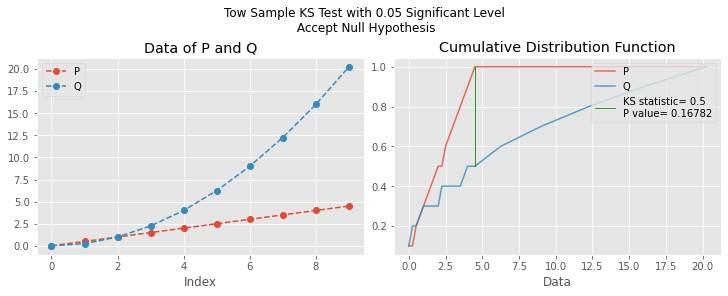

In [19]:
#@title 樣本的大小 {display-mode: "form"}
#@markdown 從虛無假設 $H_0$ 的不等式拒絕條件  
#@markdown $$D_{n,\ m} > c(\alpha)\cdot\sqrt{\frac{n+m}{n\cdot m}}，$$
#@markdown 我們可知當樣本數越小時，不等式的右邊項越大，表示拒絕虛無假設 $H_0$ 的條件越高，KS 檢定將無法有效地偵測出差異。
#@markdown </br>在下面例子 1 中，兩樣本 P 與 Q 的樣本數皆為 10 ，從資料的趨勢圖(下圖左)中，我們可明顯觀察出兩樣本的差異，然而， KS 檢定的推論卻是接受虛無假設 $H_0$，表示兩樣本之間無顯著的差異。 
#@markdown 因此，當樣本的數量太少時，不建議使用 KS 檢定。

print('例子 1 \n')
# Create tow sample data
x = np.arange(0, 5, 0.5)
p_data = pd.Series(x) 
q_data = pd.Series(x**2)

# KS Test for detecting data drift
ks_statistic, p_value, same_distribution = two_sample_ks_test(p_data, q_data)

# Data Visualization
fig = plt.figure(figsize=(10, 4), constrained_layout=True)
gs = gridspec.GridSpec(1, 2, figure=fig)
 
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(p_data, linestyle='--', marker='o', label='P')
ax1.plot(q_data, linestyle='--', marker='o', label='Q')
ax1.legend(loc=2)
ax1.set_xlabel('Index')
ax1.set_title('Data of P and Q')

ax2 = fig.add_subplot(gs[0, 1])
cdf = cdf_two_samples(p_data, q_data)
max_ks_statistic = cdf['ks_statistic'].max()
max_ks_statistic_idx = cdf[cdf['ks_statistic']==max_ks_statistic].index

ax2.plot(cdf['x'], cdf['cdf_of_p'], alpha=0.8, label='P')
ax2.plot(cdf['x'], cdf['cdf_of_q'], alpha=0.8, label='Q')

for idx in max_ks_statistic_idx:
    x = cdf.loc[idx, 'x']
    min_y = min(cdf.loc[idx, 'cdf_of_p'], cdf.loc[idx, 'cdf_of_q'])
    max_y = max(cdf.loc[idx, 'cdf_of_p'], cdf.loc[idx, 'cdf_of_q'])
    if idx==max_ks_statistic_idx.min():
        ax2.plot([x, x], [min_y, max_y], linewidth=0.8, color='green',
                  label='KS statistic= '+ str(round(ks_statistic, 3))+'\n'+
                        'P value= '+str(round(p_value, 5)))
    else:
        ax2.plot([x, x], [min_y, max_y], linewidth=0.8, color='green')   

ax2.legend(loc=1)
ax2.set_title('Cumulative Distribution Function')
ax2.set_xlabel('Data')

if same_distribution:
    fig.suptitle('Tow Sample KS Test with 0.05 Significant Level\n Accept Null Hypothesis')
else:
     fig.suptitle('Tow Sample KS Test with 0.05 Significant Level\n Reject Null Hypothesis')   

plt.show()

例子 2 



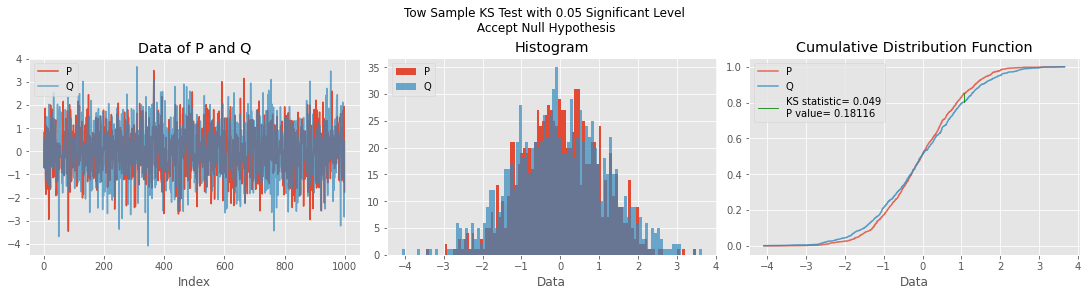


例子 3 



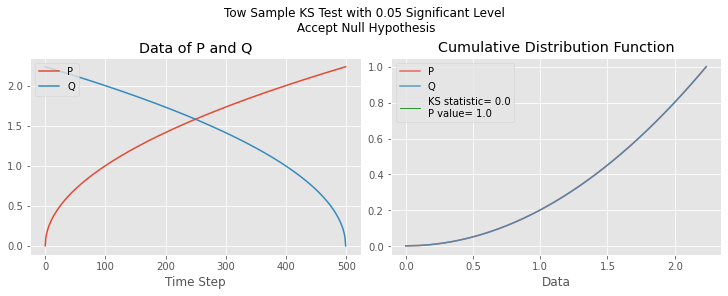

In [20]:
#@title 樣本的形狀 {display-mode: "form"}
#@markdown KS 檢定可能會受到資料分佈的形狀影響，如下面的例子 2 中，兩個樣本 P 與 Q 皆來自於常態分佈的抽樣資料，且 Q 的分佈變異數較 P 的分佈變異稍大，
#@markdown 雖然，原始資料的趨勢很相似，但是，
#@markdown KS 檢定的推論卻為拒絕虛無假設 $H_0$ 。
#@markdown </br>另外，若樣本為時序資料，在進行 KS 檢定時，除了需注意樣本數量之外，兩樣本的走勢形狀更是重要，
#@markdown 如下面的例子 3 中，兩樣本 P 與 Q 的走勢極為不同，但是， KS 檢定的推論卻接受虛無假設 $H_0$ 。

print('例子 2 \n')
# Create tow sample data
p_data = np.random.normal(loc=0, scale=1, size=1000)
q_data = np.random.normal(loc=0, scale=1, size=1000)*1.2
p_data = pd.Series(p_data)
q_data = pd.Series(q_data)

# KS Test for detecting data drift
ks_statistic, p_value, same_distribution = two_sample_ks_test(p_data, q_data)

# Data Visualization
fig = plt.figure(figsize=(15, 4), constrained_layout=True)
gs = gridspec.GridSpec(1, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(p_data, label='P')
ax1.plot(q_data, alpha=0.7, label='Q')
ax1.legend(loc=2)
ax1.set_xlabel('Index')
ax1.set_title('Data of P and Q')

ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(p_data, bins=100, label='P')
ax2.hist(q_data, bins=100, alpha=0.7, label='Q')
ax2.legend(loc=2)
ax2.set_xlabel('Data')
ax2.set_title('Histogram')

ax3 = fig.add_subplot(gs[0, 2])
cdf = cdf_two_samples(p_data, q_data)
max_ks_statistic = cdf['ks_statistic'].max()
max_ks_statistic_idx = cdf[cdf['ks_statistic']==max_ks_statistic].index

ax3.plot(cdf['x'], cdf['cdf_of_p'], alpha=0.8, label='P')
ax3.plot(cdf['x'], cdf['cdf_of_q'], alpha=0.8, label='Q')

for idx in max_ks_statistic_idx:
    x = cdf.loc[idx, 'x']
    min_y = min(cdf.loc[idx, 'cdf_of_p'], cdf.loc[idx, 'cdf_of_q'])
    max_y = max(cdf.loc[idx, 'cdf_of_p'], cdf.loc[idx, 'cdf_of_q'])
    if idx==max_ks_statistic_idx.min():
        ax3.plot([x, x], [min_y, max_y], linewidth=0.8, color='green',
                  label='KS statistic= '+ str(round(ks_statistic, 3))+'\n'+
                        'P value= '+str(round(p_value, 5)))
    else:
        ax3.plot([x, x], [min_y, max_y], linewidth=0.8, color='green')   

ax3.legend(loc=2)
ax3.set_title('Cumulative Distribution Function')
ax3.set_xlabel('Data')

if same_distribution:
    fig.suptitle('Tow Sample KS Test with 0.05 Significant Level\n Accept Null Hypothesis')
else:
     fig.suptitle('Tow Sample KS Test with 0.05 Significant Level\n Reject Null Hypothesis')   

plt.show()

print('==================================================================')
print('================================================================== \n')
print('例子 3 \n')
# Create tow sample data
x_p = np.arange(0, 5, 0.01)
x_q = x_p[::-1]
p_data = pd.Series(x_p**(1/2)) 
q_data = pd.Series(x_q**(1/2))

# KS Test for detecting data drift
ks_statistic, p_value, same_distribution = two_sample_ks_test(p_data, q_data)

# Data Visualization
fig = plt.figure(figsize=(10, 4), constrained_layout=True)
gs = gridspec.GridSpec(1, 2, figure=fig)
 
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(p_data, label='P')
ax1.plot(q_data, label='Q')
ax1.legend(loc=2)
ax1.set_xlabel('Time Step')
ax1.set_title('Data of P and Q')

ax2 = fig.add_subplot(gs[0, 1])
cdf = cdf_two_samples(p_data, q_data)
max_ks_statistic = cdf['ks_statistic'].max()
max_ks_statistic_idx = cdf[cdf['ks_statistic']==max_ks_statistic].index

ax2.plot(cdf['x'], cdf['cdf_of_p'], alpha=0.8, label='P')
ax2.plot(cdf['x'], cdf['cdf_of_q'], alpha=0.8, label='Q')

for idx in max_ks_statistic_idx:
    x = cdf.loc[idx, 'x']
    min_y = min(cdf.loc[idx, 'cdf_of_p'], cdf.loc[idx, 'cdf_of_q'])
    max_y = max(cdf.loc[idx, 'cdf_of_p'], cdf.loc[idx, 'cdf_of_q'])
    if idx==max_ks_statistic_idx.min():
        ax2.plot([x, x], [min_y, max_y], linewidth=0.8, color='green',
                  label='KS statistic= '+ str(round(ks_statistic, 3))+'\n'+
                        'P value= '+str(round(p_value, 5)))
    else:
        ax2.plot([x, x], [min_y, max_y], linewidth=0.8, color='green')   

ax2.legend(loc=2)
ax2.set_title('Cumulative Distribution Function')
ax2.set_xlabel('Data')

if same_distribution:
    fig.suptitle('Tow Sample KS Test with 0.05 Significant Level\n Accept Null Hypothesis')
else:
     fig.suptitle('Tow Sample KS Test with 0.05 Significant Level\n Reject Null Hypothesis')   

plt.show()

例子 4 



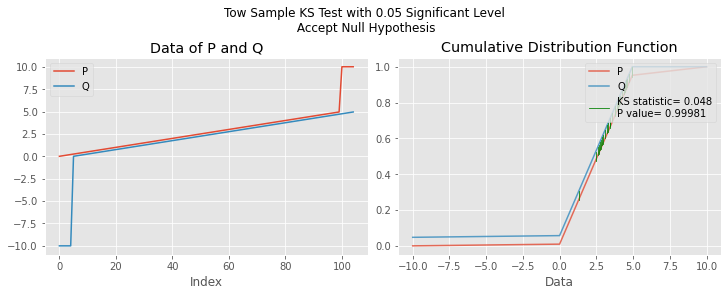

In [21]:
#@title 極值(Extremum)的影響 {display-mode: "form"}
#@markdown 由於 KS 檢定係計算兩累積分佈函數的最大差距，此統計量容易受樣本的最大值與最小值的影響。
#@markdown 當兩樣本的極值有大幅差距時，會嚴重降低 KS 檢定的可信度。
#@markdown </br>如下面例子 4 中，兩組資料 P 與 Q 皆有 105 個樣本，其中， P 的前 100 個與 Q 的後 100 個樣本相同，都在 $[0, 5]$ 區間中，
#@markdown 且， P 的後 5 筆數據值皆為 10，樣本 Q 的前 5 筆數據皆為 -10 。
#@markdown 從下圖左的趨勢圖中，我們可明顯觀察出兩樣本的差異，然而， KS 檢定的推論卻是接受虛無假設  H0 ，表示兩樣本之間無顯著的差異。
#@markdown </br>因此，當樣本中的極值與大多數的數據差異過大時，
#@markdown 建議可先對樣本資料進行轉換或考慮剔除極值。

print('例子 4 \n')
# Create data
p_data = list(np.arange(0, 5, 0.05))
p_data.extend([10, 10, 10, 10, 10])
q_data = [-10, -10, -10, -10, -10]
q_data.extend(np.arange(0, 5, 0.05))
p_data = pd.Series(p_data) 
q_data = pd.Series(q_data)

# KS Test for detecting data drift
ks_statistic, p_value, same_distribution = two_sample_ks_test(p_data, q_data)

# Data Visualization
fig = plt.figure(figsize=(10, 4), constrained_layout=True)
gs = gridspec.GridSpec(1, 2, figure=fig)
 
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(p_data, label='P')
ax1.plot(q_data, label='Q')
ax1.legend(loc=2)
ax1.set_xlabel('Index')
ax1.set_title('Data of P and Q')

ax2 = fig.add_subplot(gs[0, 1])
cdf = cdf_two_samples(p_data, q_data)
max_ks_statistic = cdf['ks_statistic'].max()
max_ks_statistic_idx = cdf[cdf['ks_statistic']==max_ks_statistic].index

ax2.plot(cdf['x'], cdf['cdf_of_p'], alpha=0.8, label='P')
ax2.plot(cdf['x'], cdf['cdf_of_q'], alpha=0.8, label='Q')

for idx in max_ks_statistic_idx:
    x = cdf.loc[idx, 'x']
    min_y = min(cdf.loc[idx, 'cdf_of_p'], cdf.loc[idx, 'cdf_of_q'])
    max_y = max(cdf.loc[idx, 'cdf_of_p'], cdf.loc[idx, 'cdf_of_q'])
    if idx==max_ks_statistic_idx.min():
        ax2.plot([x, x], [min_y, max_y], linewidth=0.8, color='green',
                  label='KS statistic= '+ str(round(ks_statistic, 3))+'\n'+
                        'P value= '+str(round(p_value, 5)))
    else:
        ax2.plot([x, x], [min_y, max_y], linewidth=0.8, color='green')   

ax2.legend(loc=1)
ax2.set_title('Cumulative Distribution Function')
ax2.set_xlabel('Data')

if same_distribution:
    fig.suptitle('Tow Sample KS Test with 0.05 Significant Level\n Accept Null Hypothesis')
else:
     fig.suptitle('Tow Sample KS Test with 0.05 Significant Level\n Reject Null Hypothesis')   

plt.show()

# **參考資料**  

* Kolmogorov–Smirnov test. (2023, February 2). In *Wikipedia*.   
[https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)

### **文章**  
##### 註: 順序為作者的閱讀順序   
* Marc-Olivier Arsenault (2017), *KOLMOGOROV–SMIRNOV TEST*,   
from [https://towardsdatascience.com/kolmogorov-smirnov-test-84c92fb4158d](https://towardsdatascience.com/kolmogorov-smirnov-test-84c92fb4158d).  
* Vinícius Trevisan (2022), *Comparing sample distributions with the Kolmogorov-Smirnov (KS) test*,  
from [https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5](https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5).  
* Vinícius Trevisan (2022), *Evaluating classification models with Kolmogorov-Smirnov (KS) test*,  
from [https://towardsdatascience.com/evaluating-classification-models-with-kolmogorov-smirnov-ks-test-e211025f5573](https://towardsdatascience.com/evaluating-classification-models-with-kolmogorov-smirnov-ks-test-e211025f5573).      
* Tavish Srivastava (2023), *12 Important Model Evaluation Metrics for Machine Learning Everyone Should Know (Updated 2023)*,   
from [https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/](https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/).   
* Rick Wicklin (2019), *Critical values of the Kolmogorov-Smirnov test*,  
from [https://blogs.sas.com/content/iml/2019/05/20/critical-values-kolmogorov-test.html](https://blogs.sas.com/content/iml/2019/05/20/critical-values-kolmogorov-test.html). 

### **論文**  
* A. Ivanov and G. Riccardi, "*Kolmogorov-Smirnov test for feature selection in emotion recognition from speech*," 2012 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP), Kyoto, Japan, 2012, pp. 5125-5128, doi: 10.1109/ICASSP.2012.6289074.
